In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
#import matplotlib.cbook as cbook
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import gmaps
import os


# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Input File Path (CSV)
#csv_path = "C:\Users\Lenovo\Desktop\Project_One_2020EKTPHB\csv_files"

# Read clean csv files into DataFrames
age_of_inventory_df = pd.read_csv(r'clean_csv_files\age_of_inventory_c.csv')
days_on_zillow_df = pd.read_csv(r'clean_csv_files\days_on_zillow_c.csv')

median_price_reduction_df = pd.read_csv(r'clean_csv_files\median_price_reduction_c.csv')
median_sale_price_df = pd.read_csv(r'clean_csv_files\median_sale_price_c.csv') 
monthly_home_sales_df = pd.read_csv(r'clean_csv_files\monthly_home_sales_c.csv') 

monthly_market_value_df = pd.read_csv(r'clean_csv_files\monthly_market_value_c.csv') 
new_monthly_listings_df = pd.read_csv(r'clean_csv_files\new_monthly_listings_c.csv') 

age_of_inventory_df 


,RegionName,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
0,United States,104.0,102.0,86.0,68.0,62.0,64.0,69.0,72.0,77.0,81.0,85.0,92.0
1,"Houston, TX",93.0,88.0,67.0,56.0,55.0,62.0,64.0,70.0,83.0,88.0,90.0,89.0


<Figure size 864x360 with 0 Axes>

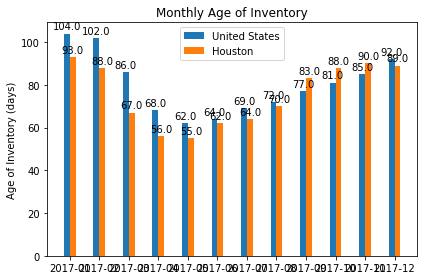

In [2]:
# Create group bar chart
# Transpose DataFrame
aoi = age_of_inventory_df.T
aoi = aoi.iloc[1:85]
# Reset index and rename columns
aoi = aoi.reset_index()
aoi = aoi.rename(columns = {0:"United States", 1:"Houston", "index":"Year-Month"})
# Define axes
labels = aoi["Year-Month"]
us_data = aoi["United States"]
hou_data = aoi["Houston"]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig= plt.figure(figsize=(12,5))
#fig, ax = plt.subplots(nrows=1, ncols=1)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, us_data, width, label='United States')
rects2 = ax.bar(x + width/2, hou_data, width, label='Houston')

#matplotlib.pyplot.figure(num=None, figsize=[8.4, 4.8])



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Age of Inventory (days)')
ax.set_title('Monthly Age of Inventory')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
#plt.figure(figsize=(5,7))
fig.tight_layout()
plt.show()

In [3]:
# Generate some fake data to test with
def gendata(loc=0):
    population = us_data   # United States   # use larger data sets for both, 5 times more for pop
    sample = hou_data      # Houston

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

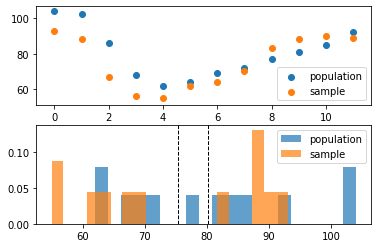

In [4]:
# Generate some data and show the scatter plot
population, sample = gendata()

In [5]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-1.141682627080816, pvalue=0.27783003703532083)

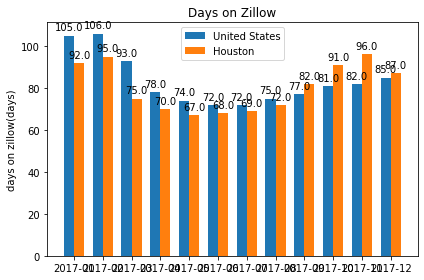

In [6]:
days_on_zillow_df
aoi = days_on_zillow_df.T
aoi = aoi.iloc[1:85]
aoi = aoi.reset_index()
aoi = aoi.rename(columns = {0:"United States", 1:"Houston", "index":"Year-Month"})
#ax = aoi.plot.bar(x='Year-Month', y='United States', rot=0)
labels = aoi["Year-Month"]
men_means = aoi["United States"]
women_means = aoi["Houston"]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='United States')
rects2 = ax.bar(x + width/2, women_means, width, label='Houston')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('days on zillow(days)')
ax.set_title('Days on Zillow')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()